# ETL on PDF

## Imports

In [23]:
import os
import PyPDF2
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Data Loading 

In [5]:
def load_all_pdfs_pypdf2(folder_path):
    all_data = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'rb') as f:
                    reader = PyPDF2.PdfReader(f)
                    for page_num, page in enumerate(reader.pages):
                        text = page.extract_text()
                        if text:
                            lines = text.split('\n')
                            for line in lines:
                                clean_line = line.strip()
                                if clean_line:
                                    all_data.append({
                                        'file': filename,
                                        'page': page_num + 1,
                                        'line': clean_line
                                    })
            except Exception as e:
                print(f"Error reading {filename}: {e}")
    
    return pd.DataFrame(all_data)


## Clean PDF Data

In [7]:
def clean_pdf_df(df):
    # Strip leading and trailing whitespace
    df['line'] = df['line'].str.strip()
    
    # Remove empty rows
    df = df[df['line'] != '']
    
    # Remove duplicate words in each 'line'
    df['line'] = df['line'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))
    
    # Remove duplicate rows based on the 'line' column
    df = df.drop_duplicates(subset=['line'])
    
    # Reset the index
    return df.reset_index(drop=True)

## Explore or Transform

In [9]:
def word_frequency(df):
    words = ' '.join(df['line']).split()
    return Counter(words)

## Example Usage

In [11]:
print(os.getcwd())

folder_path = "../Data/pdfs"  # Your folder path
pdf_df = load_all_pdfs_pypdf2(folder_path)
pdf_df = clean_pdf_df(pdf_df)
word_count = word_frequency(pdf_df)
print(word_count.most_common(5)) ## word amount of word apperances 
print(pdf_df.head())
print(pdf_df.tail())

C:\Users\vuffo\OneDrive\Desktop\BI\GroupBI\MP1-Group9\Code
[('x', 15), ('som', 9), ('at', 8), ('der', 6), ('til', 6)]
                                  file  page  \
0  (Kopi) AltF4Hub Glossary - Ark1.pdf     1   
1  (Kopi) AltF4Hub Glossary - Ark1.pdf     1   
2  (Kopi) AltF4Hub Glossary - Ark1.pdf     1   
3  (Kopi) AltF4Hub Glossary - Ark1.pdf     1   
4  (Kopi) AltF4Hub Glossary - Ark1.pdf     1   

                                line  
0                            Noun in  
1                business domainNoun  
2  explanation Noun in codeNoun code  
3        explanation Class Attribute  
4                 AdminEn person med  
                                    file  page  \
115  (Kopi) AltF4Hub Glossary - Ark1.pdf     4   
116  (Kopi) AltF4Hub Glossary - Ark1.pdf     4   
117  (Kopi) AltF4Hub Glossary - Ark1.pdf     4   
118  (Kopi) AltF4Hub Glossary - Ark1.pdf     4   
119                              MP1.pdf     1   

                                                  line  
1

## Visualize PDF

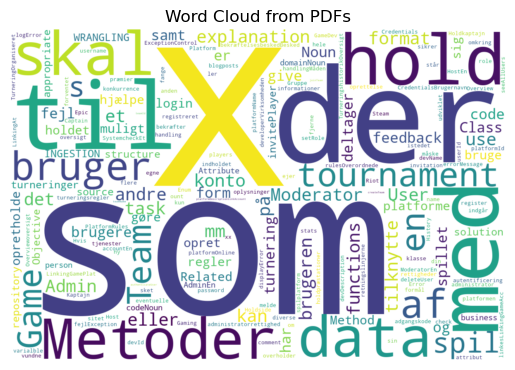

In [13]:
def plot_wordcloud(text):
    wc = WordCloud(width=1200, height=800, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud from PDFs")
    plt.show()

all_text = ' '.join(pdf_df['line'])
plot_wordcloud(all_text)

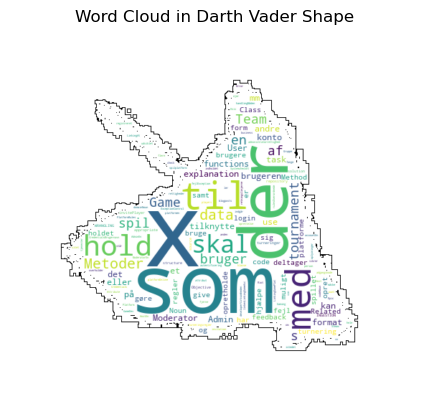

In [29]:
def plot_wordcloud(text, mask_image_path):
    # Load the Darth Vader image as the mask
    unicorn_mask = np.array(Image.open(mask_image_path))

    wc = WordCloud(width=1200, height=800, background_color='white', mask=unicorn_mask, contour_width=1, contour_color='black').generate(text)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud in Darth Vader Shape")
    plt.show()

all_text = ' '.join(pdf_df['line'])
unicorn_image_path = '../Data/Vader.png'  # Replace this with the actual path to your unicorn image
plot_wordcloud(all_text, unicorn_image_path)